# Unbinned maximum likelihood fit

The probability denstiy function for the distribution of an angle $\alpha$ is given by

$$ f(x; a) = \frac{1 + a x}{2}, \quad x = \cos \alpha$$.

The parameter $a$ is in the range $-1 \le a \le 1$.

## Tasks

a) Determine the maximum-likelihood estimate $\hat a$ of the parameter $a$ and its uncertainty from the provided data sample using a numerical minimization tool, e.g., `iminuit` (see comments below).

b) Plot the histogram representation of the data along with the fit function.

c) Determine the uncertainties $\sigma_a^-$ and $\sigma_a^+$ defined by

$$ \ln L (\hat a \pm \sigma_a) =  \ln L_\mathrm{max} - \frac{1}{2} $$

Compare your result with the result of `iminuit`'s `minos()` routine. Reduce the sample size of the data set by only taking the first $n$ events (`x[:n]`). At approximately which value of $n$ is the difference between $\sigma_a^-$ and $\sigma_a^+$ bigger than 5\%? 

Use the data generation provided in the notebook `S01_ml_02_generate_data.ipynb`. It is recommended to actually generate a `CSV` file and read it back here. You don't necessarily have to hand in your generated data; the tutors can generate their own and since your implemented procedure is generic, it should work with any other dataset generated with `S01_ml_02_generate_data.ipynb`.


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.

Also, the function imported as `from scipy.optimize import brentq` might come in handy.


## Comments on Python's `iminuit`

The KIP service has iminuit version 1.3.8. Please note that the most recent version is $\geq2.0.0$ and that the [documentation](https://iminuit.readthedocs.io/en/stable/) applies to *that* version. Some backward-incompatible changes have been introduced, some of which changed some interfaces. For your tasks that mainly affects the `minuit.Minuit` constructor. The following shows the construction of a `Minuit` object for version 1.3.8 (in case you use the KIP service or a version $<2.0.0$) and $\geq2.0.0$ (in case you use another service implementing a higher version), respectively.
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=1
# likelihood method: errordef=0.5
m = Minuit(func, par1=0.1, par2=0.1, ..., parN=0.1, errordef=1)
```

And this would be the equivalent workflow for versions >2.0.0
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=Minuit.LEAST_SQUARES
# likelihood method: errordef=Minuit.LIKELIHOOD

# add errordef as an attribute of your defined minimisation function which will be checked for when optimised
func.errordef = Minuit.LEAST_SQUARES
m = Minuit(func, par1=0.1, par2=0.1, ..., parN=0.1)
```

Another (potenitally) Jupiter related *feature* is the fact that `m.migrad()`, `m.matrix()`, `m.minos()` etc. can yield a nice summary of the respective procedure. However, in order to show it, either of these methods (and potentially others in case you use them) have to be *the last line of a code cell*. If there is *anything* coming afterwards, the output will not be printed, hence, for anything that follows, it is recommended to start a new code cell.

### Solution

In [31]:
import numpy as np
from numpy import exp, cos, sqrt, log
import matplotlib.pyplot as plt
from iminuit import Minuit
from matplotlib import rcParams

In [32]:
# Default plot style
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = (5,10)

rcParams['figure.figsize'] = (12, 7)
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

# Fit parameters
# box design
props = dict(boxstyle = 'round', facecolor = 'white', alpha = 0.5)

# make a box with parameters in plot
def textstrer(title, params, err_params, units, labels, a, b, r = 2, 
              fonts = 14, ax = plt):
    textstr = np.array([title + '\n'])
    
    for i in range(len(params)):
        textstr = np.append(textstr, 
                            '${} = {} \pm {}\ {}$' .
                            format(labels[i],
                                   round(params[i], r),
                                   round(err_params[i], r),
                                   units[i]
                                  )) # Create a textstring w/ all parameters
    ax.text(a, b, ''.join(map(lambda x: x[:] + '\n', textstr)),
            verticalalignment = 'top', fontsize = fonts, bbox = props)

The maximum likelihood function for a set of measured values $\{x_i\}$ is given by the product of the probability densities

$$ L(x, \vec{\lambda}) = \prod_{i = 1}^n f(x_i, \vec{\lambda}). $$

We can find the best estimator $\vec{\hat{\lambda}}$ by maximizing $L$ with respect to $\lambda$. In the case of the probability density function of an angle $\alpha$, we get

$$ L(x,\, a) = \prod_{i = 1}^n \dfrac{1 + a x_i}{2}. $$

We can also define the logarithm of the maximum likelihood function as

$$ \log{L} = \sum_{i = 1}^n \log{\dfrac{1 + a x_i}{2}}$$

a) We determine first the optimal parameter $\hat{a}$ using Minuit.

In [33]:
x = np.loadtxt("ml_fit_data.csv")
x = x[:30]

# Define log L
def log_L(a):
    return - np.sum(log( (1 + a * x) / 2 ))

# Minimize this
''' We have since learned to use the Minuit function pretty good and we can 
simply follow the regular protocol, except we have to make one small change:
As we see in the definition of log_L, we included a relative minus sign to 
account for the fact that the Minuit function can only find minima '''
log_L.errordef = Minuit.LIKELIHOOD
m_a = Minuit(log_L, a = 0.2)
m_a.migrad()
m_a.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 20.14                      │              Nfcn = 23               │
│ EDM = 3.44e-10 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.34   │   0.29    │   -0.27    │    0.30    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           a           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.27   │   0.30    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0823 │
└───┴────────┘

b) Next we visualize the histogram representation along with the fit function

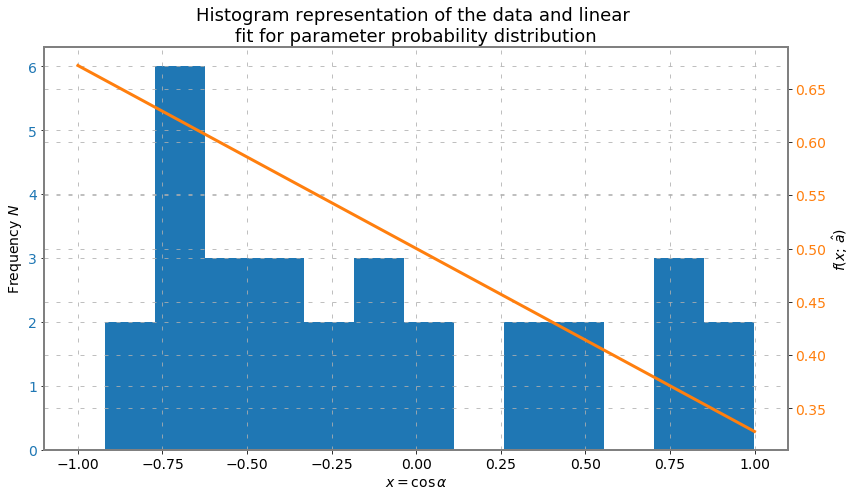

In [34]:
# Plot
x_lin = np.linspace(-1, 1, 100)
fig, ax1 = plt.subplots()

ax1.set_title('''Histogram representation of the data and linear 
fit for parameter probability distribution''')

ax1.hist(x, bins = 13)
ax1.set_xlabel('$x = \cos{\, \\alpha}$')
ax1.set_ylabel('Frequency $N$')
ax1.tick_params(axis='y', labelcolor = 'C0')

ax2 = ax1.twinx()

ax2.plot(x_lin, (1 + m_a.values[0] * x_lin) / 2, linewidth = 3, color = 'C1')
ax2.set_ylabel('$f(x;\, \hat{a})$')
ax2.tick_params(axis='y', labelcolor = 'C1')

fig.tight_layout()
fig.show()

Here we can see the probability density function $f(x;\, \hat{a})$ compared to the actual distribution. It would appear as though values for larger $x$ are likelier. We can confirm this by looking at the generation of the data. 

c) We now determine the uncertainties $\sigma_a^-$ and $\sigma_a^+$ defined by

$$ \ln L(\hat{a} \pm \sigma_a) = \ln L_{\mathrm{max}} - \dfrac{1}{2}. $$

This means, that we'll take a look at the maximum of the graph and from that we will subtract $1/2$. This will give us an intersection on two points and at these points we will find the uncertainties $\sigma_a^{\pm}$.

We already know intuitively where we'll find $L_{\mathrm{max}}$, since our optimal parameter was found in this case for

In [35]:
print('a_hat = ', np.round(m_a.values[0], 2))

a_hat =  -0.34


so we should get a value of 

In [36]:
print('log_L_max = ', -np.round(log_L(0.43), 3) )

log_L_max =  -23.4


In [37]:
# Define log L list
def log_Ls(a):
    log_L_list = np.array([])
    
    for i in a:
        log_L_list = np.append(log_L_list, np.sum(log( (1 + i * x) / 2 )) )

    return log_L_list

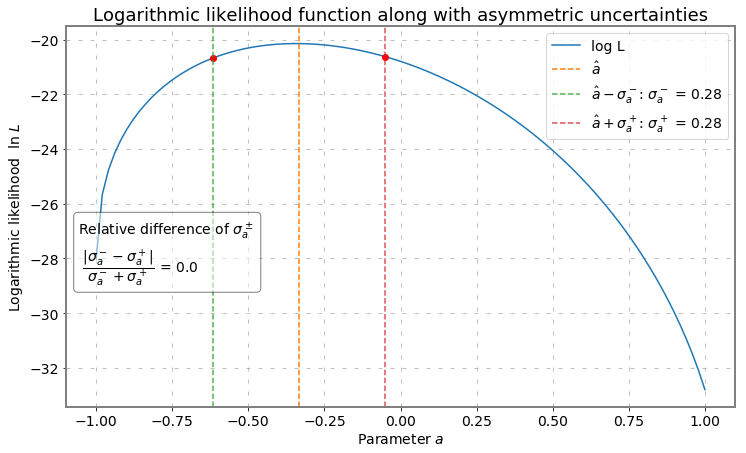

In [38]:
# Find maxima and intersections
a_lin = np.linspace(-1, 1, 100)
log_L_max = np.max(log_Ls(a_lin))
a_max = a_lin[np.argmax(log_Ls(a_lin))]
log_L_max_pm = log_L_max - 1 / 2

# Here intersect
idx = np.argwhere(np.diff(np.sign(log_L_max_pm - log_Ls(a_lin)))).flatten()

sigma_minus = a_max - a_lin[idx[0]]
sigma_plus = - a_max + a_lin[idx[1]]

# Plot
fig, ax = plt.subplots()

ax.set_title('Logarithmic likelihood function along with asymmetric uncertainties')
ax.plot(a_lin, log_Ls(a_lin), label = 'log L')

plt.plot(a_lin[idx], log_Ls(a_lin[idx]), 'ro')

ax.axvline(a_max, ls = '--', color = 'C1', label = '$\hat{a}$')
ax.axvline(a_lin[idx[0]], ls = '--', color = 'C2', alpha = 0.8, 
           label = '$\hat{a} - \sigma_{a}^-$: $\sigma_a^-$ = ' 
           + str(np.round(sigma_minus, 2)) )
ax.axvline(a_lin[idx[1]], ls = '--', color = 'C3', alpha = 0.8, 
           label = '$\hat{a} + \sigma_{a}^+$: $\sigma_a^+$ = ' 
           + str(np.round(sigma_plus, 2)) )

ax.set_xlabel('Parameter $a$')
ax.set_ylabel('Logarithmic likelihood  ln $L$')

y_text = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) / 2
ax.text(-1.06, y_text, '\nRelative difference of $\\sigma_a^\pm$ \n ' + 
        '$\dfrac{|\sigma_a^- - \sigma_a^+|}{\sigma_a^- + \sigma_a^+}$ = ' + 
        str(np.round( (np.abs(sigma_minus - sigma_plus)) / (sigma_minus + sigma_plus) ,2)),
        verticalalignment = 'top', fontsize = 14, bbox = props)

ax.legend(loc = 'best')
fig.show()

Now we compare this to python's iminuit's .minos() routine:

In [39]:
m_a.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 20.14                      │              Nfcn = 28               │
│ EDM = 3.44e-10 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.34   │   0.29    │   -0.27    │    0.30    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           a           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.27   │   0.30    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0823 │
└───┴────────┘

We can see that up to a different sign convention, this method also returns similar values. 

We will finally proceed to the last part where we determine the relative difference as before, but dependent on the sample number we take. We want to find how many samples we need to reduce the relative difference to only 5%.

In [40]:
# Load data

# Define function that sorts through many n
def func_n(n):
    sigma_rel = np.array([])
    n_work = np.array([])
    
    for i in range(n):
        x = np.loadtxt("ml_fit_data.csv")[:i] 
        # Define log L
        def log_L(a):
            return - np.sum(log( (1 + a * x) / 2 ))

        # Minimize this
        log_L.errordef = Minuit.LIKELIHOOD
        m_a = Minuit(log_L, a = 0.01)
        m_a.migrad()
        ''' Sometimes, no valid minimum is found so we have to account for that
        with a try / except clause'''
        try:
            m_a.minos()
            sigma_minus = abs(m_a.merrors[0].lower)
            sigma_plus = m_a.merrors[0].upper
        
            rel = abs(sigma_minus - sigma_plus) / (sigma_minus + sigma_plus)
        
            sigma_rel = np.append(sigma_rel, rel)
            n_work = np.append(n_work, i)
        except:
            pass
        
    return sigma_rel, n_work #rel

sigmas, ns = func_n(200)

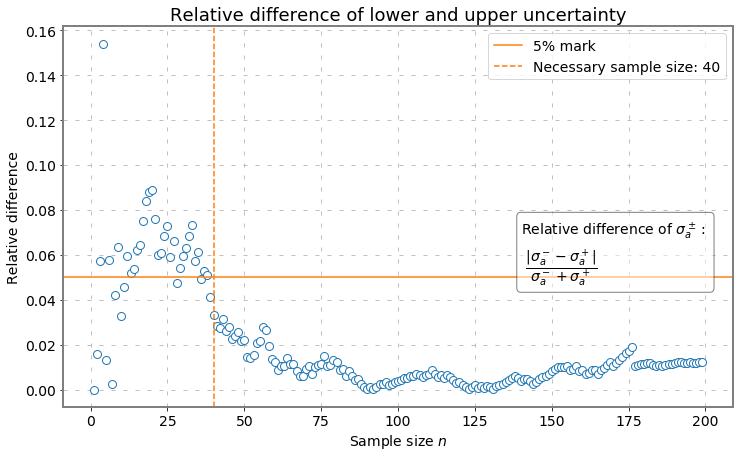

In [41]:
# Plot

fig, ax = plt.subplots()
ax.set_title('Relative difference of lower and upper uncertainty')
ax.plot(ns, sigmas, 'o', mfc = 'w', markeredgewidth = 1, markersize = 8, 
        linewidth = 2)
ax.axhline(0.05, color = 'C1', label = '5% mark')
ax.axvline(40, color = 'C1', ls = '--', label = 'Necessary sample size: 40')
ax.set_xlabel('Sample size $n$')
ax.set_ylabel('Relative difference')

ax.legend(loc = 'best')

y_text = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) / 2
ax.text(140, y_text, '\nRelative difference of $\\sigma_a^\pm:$ \n ' + 
        '$\dfrac{|\sigma_a^- - \sigma_a^+|}{\sigma_a^- + \sigma_a^+}$',
        verticalalignment = 'top', fontsize = 14, bbox = props)

fig.show()

Within this graph we can observe that the asymmetry of the uncertainties is especially large if we don't have enough data points for the estimation algorithm, but the relative difference tends towards 0 for increasing sample sizes. In our case, it requires around 40 data points for the relative difference to be lower than 5%, but this result may vary depending on the data set.